# Programming for Data Analytics - Project

# Project - An investigation into Simulating Data

References additional:

https://www.daveoncode.com/2013/05/20/generate-random-dates-in-python-using-datetime-and-random-modules/<br>
https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html<br>
https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib<br>
https://realpython.com/python-histograms/<br>
https://stackoverflow.com/questions/34347145/pandas-plot-doesnt-show<br>
http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot<br>
https://stackoverflow.com/questions/47487753/when-is-it-appropriate-to-use-df-value-counts-vs-df-groupby-count<br>
https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/<br>
https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/<br>

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
np.random.seed(0)

In [6]:
uni_name = ['UL', 'TCD', 'DCU', 'UCD', 'NUIG']

In [7]:
cat_name = ['Vet', 'Agric', 'Lab', 'Library', 'Specific']

In [8]:
ee_name = ['Ann', 'Mary', 'Tom', 'John', 'Mark']

In [9]:
raw_data = {'University': np.random.choice(uni_name, 50), 
        'Category': np.random.choice(cat_name, 50), 
        'Spend': np.random.randint(25000, 100000, 50),
        'Month': np.random.randint(1, 13, 50),
        'Specialist': np.random.choice(ee_name, 50)}
df = pd.DataFrame(raw_data, columns = ['University', 'Category', 'Spend', 'Month', 'Specialist'])


In [10]:
df.to_csv('unispend.csv')

In [11]:
data = pd.read_csv("unispend.csv")

In [14]:
data

,Unnamed: 0,University,Category,Spend,Month,Specialist
0,0,NUIG,Agric,61223,8,Tom
1,1,UL,Lab,86570,9,Tom
2,2,UCD,Lab,31521,9,Mark
3,3,UCD,Vet,81894,10,John
4,4,UCD,Agric,99659,3,Mary
5,5,TCD,Agric,39254,9,Tom
6,6,UCD,Agric,76939,7,John
7,7,DCU,Agric,62073,12,Mary
8,8,NUIG,Library,48310,7,Mark
9,9,UL,Library,56785,10,Tom


In [22]:
data.describe()

,Unnamed: 0,Spend,Month
count,50.00000,50.000000,50.000000
mean,24.50000,62722.180000,7.300000
std,14.57738,22704.361999,2.970948
min,0.00000,25469.000000,1.000000
25%,12.25000,41050.000000,4.250000
50%,24.50000,62011.500000,7.500000
75%,36.75000,81759.500000,9.750000
max,49.00000,99659.000000,12.000000


In [23]:
data.mean()

Unnamed: 0       24.50
Spend         62722.18
Month             7.30
dtype: float64

In [21]:
data[['University', 'Month']]

,University,Month
0,NUIG,8
1,UL,9
2,UCD,9
3,UCD,10
4,UCD,3
5,TCD,9
6,UCD,7
7,DCU,12
8,NUIG,7
9,UL,10


In [27]:
import seaborn as sns

C:\Users\Windows\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


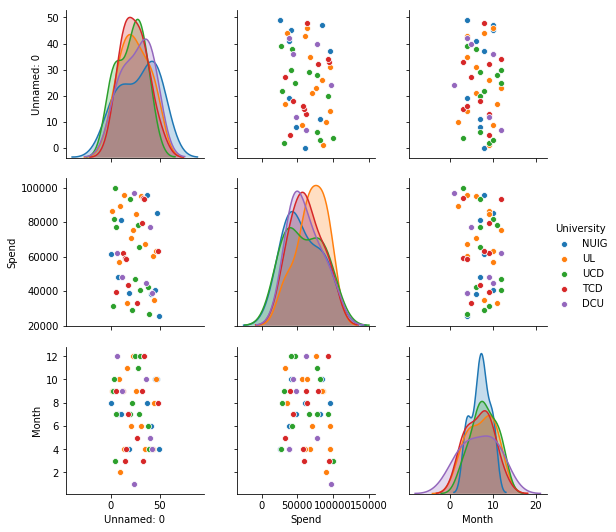

In [29]:
sns.pairplot(data, hue='University')

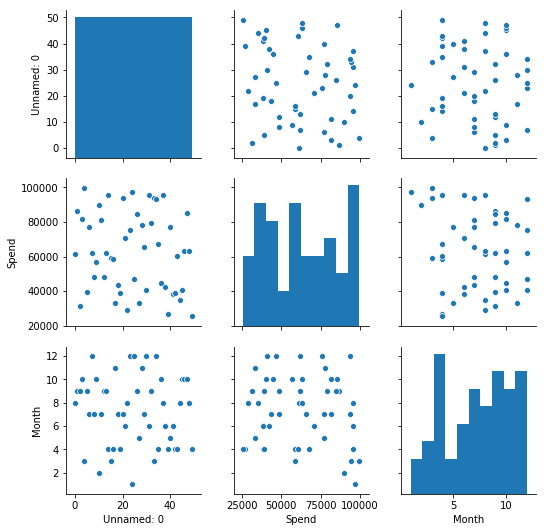

In [30]:
sns.pairplot(data)